In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import ssl
import numpy as np
from sklearn import linear_model

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
response = requests.get('https://artlive.artisticmilliners.com:8081/ords/art/mlapi/d_sales_year', verify = False).text
response_info = json.loads(response)
data=response_info['items']

C:\Users\Naeem\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'artlive.artisticmilliners.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Naeem\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'artlive.artisticmilliners.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
df=pd.DataFrame(data)
df.head()

,trxyear,trxmonth,msno,total_amount_bill,total_mtrs_mill
0,2018,JUL-17,1707,14.08,4.56
1,2018,AUG-17,1708,14.56,4.87
2,2018,SEP-17,1709,13.73,4.51
3,2018,OCT-17,1710,15.72,4.90
4,2018,NOV-17,1711,15.29,4.84


In [4]:
date=pd.to_datetime(df['trxmonth'],format='%b-%y')
date

0    2017-07-01
1    2017-08-01
2    2017-09-01
3    2017-10-01
4    2017-11-01
5    2017-12-01
6    2018-01-01
7    2018-02-01
8    2018-03-01
9    2018-04-01
10   2018-05-01
11   2018-06-01
12   2018-07-01
13   2018-08-01
14   2018-09-01
15   2018-10-01
16   2018-11-01
17   2018-12-01
18   2019-01-01
19   2019-02-01
20   2019-03-01
21   2019-04-01
22   2019-05-01
23   2019-06-01
24   2019-07-01
25   2019-08-01
26   2019-09-01
27   2019-10-01
28   2019-11-01
29   2019-12-01
30   2020-01-01
31   2020-02-01
32   2020-03-01
33   2020-04-01
34   2020-05-01
35   2020-06-01
36   2020-07-01
37   2020-08-01
38   2020-09-01
39   2020-10-01
40   2020-11-01
41   2020-12-01
42   2021-01-01
43   2021-02-01
44   2021-03-01
45   2021-04-01
46   2021-05-01
47   2021-06-01
48   2021-07-01
49   2021-08-01
50   2021-09-01
51   2021-10-01
52   2021-11-01
53   2021-12-01
54   2022-01-01
55   2022-02-01
56   2022-03-01
57   2022-04-01
58   2022-05-01
Name: trxmonth, dtype: datetime64[ns]

In [20]:
rev_m=df['total_mtrs_mill']
type(rev_m)

pandas.core.series.Series

In [7]:
det = pd.concat([date, rev_m], join = 'outer', axis = 1)
det

,trxmonth,total_mtrs_mill
0,2017-07-01,4.56
1,2017-08-01,4.87
2,2017-09-01,4.51
3,2017-10-01,4.90
4,2017-11-01,4.84
5,2017-12-01,5.11
6,2018-01-01,5.83
7,2018-02-01,4.69
8,2018-03-01,5.26
9,2018-04-01,5.46


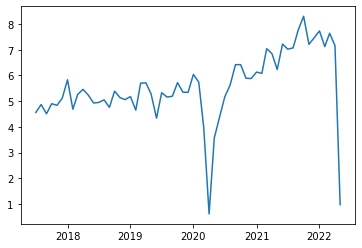

In [8]:
plt.plot(date, rev_m)
plt.show(block=False);

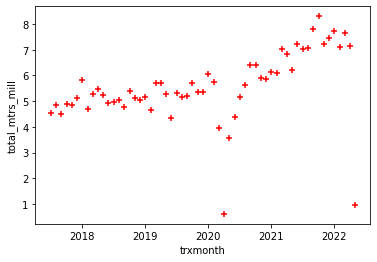

In [9]:
%matplotlib inline
plt.xlabel('trxmonth')
plt.ylabel('total_mtrs_mill')
plt.scatter(det.trxmonth,det.total_mtrs_mill,color='red',marker='+')

In [10]:
rev_m=pd.DataFrame(rev_m)
date=pd.DataFrame(date)

In [11]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(date,rev_m,test_size=0.3)

In [12]:
type(rev_m)

pandas.core.frame.DataFrame

In [13]:
det.shape

(59, 2)

In [14]:
type(b_train)


pandas.core.frame.DataFrame

In [15]:
from sklearn.linear_model import LinearRegression
LRS = LinearRegression()
LRS.fit(a_train,b_train)

LinearRegression()

In [16]:
pred=LRS.predict(rev_m)

In [17]:
pred

array([[-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25.53744191],
       [-25

In [18]:
LRS.score(a_test,b_test)

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.